Name: Saman Akhtar USC ID: 9944619932

**Imports**

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn import metrics
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier as knn


# Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 . Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data , which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [3]:
breast_df = pd.read_csv('../data/wdbc.csv', header=None)


In [4]:
breast_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
features = ["radius"," texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry",
"fractal dimension"]

In [684]:
# Creating column for Breast Cancer Wisconsin (Diagnostic) Data Set
new_col_names = ['ID num', 'Diagnosis']
col = breast_df.shape[1]/len(features)
for i in range(1, int(col)+ 1):
    for j in features:
        col = [j+ str(i)]
        new_col_names.extend([j+ str(i)])


In [7]:
breast_df.columns = new_col_names

In [8]:
breast_df["Diagnosis"].replace({'B' : 0, 'M' : 1}, inplace=True)

In [9]:
breast_df

,ID num,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
breast_df["Diagnosis"].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

## (b) Monte-Carlo Simulation : Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F 1 -score, and AUC) that you obtain from each algorithm

In [81]:
def split_dataset(data, test_size = 0.2, rand = 50):
    np.random.seed(50)
    
    # Get 20 % of malign data for test
    breast_malign = data[breast_df["Diagnosis"] == 1]
    test_malign = breast_malign.sample(frac = test_size, random_state = rand)
    
    # Get 20 % of benign data for test
    breast_benign = data[breast_df["Diagnosis"] == 0]
    test_benign = breast_benign.sample(frac = test_size, random_state = rand)
    test_df = pd.concat([test_benign, test_malign])
    train_df  = data.loc[~data.index.isin(test_df.index)]
    return train_df, test_df

In [74]:
train_df, test_df = split_dataset(breast_df)

In [39]:
test_df

,ID num,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
399,904357,0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,...,13.450,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121
71,859711,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
310,893783,0,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,...,12.610,26.55,80.92,483.1,0.1223,0.10870,0.07915,0.05741,0.3487,0.06958
544,922297,0,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,...,15.050,24.75,99.17,688.6,0.1264,0.20370,0.13770,0.06845,0.2249,0.08492
528,918192,0,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,...,14.620,15.38,94.52,653.3,0.1394,0.13640,0.15590,0.10150,0.2160,0.07253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,9012000,1,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,...,27.660,25.80,195.00,2227.0,0.1294,0.38850,0.47560,0.24320,0.2741,0.08574
95,86208,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,...,24.220,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
321,894618,1,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,...,23.060,23.03,150.20,1657.0,0.1054,0.15370,0.26060,0.14250,0.3055,0.05933
297,892189,1,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915


In [40]:

train_df

,ID num,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [11]:
def split_preres(train_df, test_df):
    trainX = train_df.iloc[:, 2:]
    testX = test_df.iloc[:, 2:]
    trainY = train_df.iloc[:, 1]
    testY = test_df.iloc[:, 1]
    return trainX, trainY, testX, testY


In [685]:
def normalize(trainX, testX):
    normalize = Normalizer()
    val_train = normalize.fit_transform(trainX)
    val_test = normalize.transform(testX)
    train_X = pd.DataFrame(val_train)
    train_X.columns = trainX.columns
    test_X = pd.DataFrame(val_test)
    test_X.columns = testX.columns
    return train_X, test_X

### i. Supervised Learning: Train an L 1 -penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F 1 -score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs. 

In [689]:
def dispCOROC(act_y, pred_y, prob_y, type_dataset ):
   
    print("The confusion matrix of the ", type_dataset," data is:\n",confusion_matrix(act_y, pred_y))
    accuracy = accuracy_score(act_y, pred_y)
    print("Accuracy  of the ",type_dataset," data is:\n%0.4f "  %accuracy) 
    fpr, tpr, thresholds  = roc_curve(act_y, prob_y)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='green',lw = 2, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of Training data')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
l1_model = LinearSVC(penalty='l1', dual=False)
tuned_param =  [{'C': np.logspace(-2, 7, 10)}]

In [692]:
def displayResult(y, pred_y, prob_y):
    accuracy = accuracy_score(y, pred_y)
    prec = precision_score(y, pred_y, pos_label=1)
    recall = recall_score(y, pred_y, pos_label=1)
    fscore = f1_score(y, pred_y, pos_label=1, average='weighted')
    auc = roc_auc_score(y,  prob_y)
    
    return accuracy, prec, recall, fscore, auc

In [693]:
def mcl1SVM(n, data, cls = l1_model, tuned_params = tuned_param ):
    train_details = []
    test_details = []
  
    for i in range(n):
        
        # Split the data
        train_df, test_df = split_dataset(data, test_size = 0.2, rand = i)
         
        # Split the predictors and the response
        trainX, train_y, testX, test_y = split_preres(train_df, test_df)
        
        # Normalize the training and testing dataset
        train_X, test_X = normalize(trainX, testX)
        model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                             cv = StratifiedKFold(5, random_state = i, shuffle=True) )
    
        # Fit the classifier
        model.fit(train_X, train_y)
        
        print("The best parameters :", model.best_params_, "\n") 
        
        # Now fit the SVM l1 with best C
        best_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
        best_fit.fit(train_X, train_y)
        
        # Predict the response
        # For the training data
        pred_y = best_fit.predict(train_X)
        prob_y = best_fit.decision_function(train_X)
        accuracy, pre, recall, f1_score, auc = displayResult(train_y, pred_y, prob_y)
        train_details.append( [accuracy, pre, recall, f1_score, auc])
        
        # For the testing data
        pred_y_tst = best_fit.predict(test_X)
        prob_y_tst = best_fit.decision_function(test_X)
        accu_test, pre_test, recall_test, f1_score_test, auc_test = displayResult(test_y, pred_y_tst, prob_y_tst)
        test_details.append([accu_test, pre_test, recall_test, f1_score_test, auc_test])
        
    print("\n Confusion Matrix and ROC plot of ",i + 1," run of Monte-Carlo is: \n")
    
    # Display confusion matrix and ROC curve for training data
    dispCOROC(train_y, pred_y,prob_y, 'training')
    
    # Display confusion matrix and ROC curve for testing data
    dispCOROC( test_y, pred_y_tst,prob_y_tst, 'testing')
    train_all = pd.DataFrame(data = train_details, columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_all = pd.DataFrame(data = test_details,columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    # Find out average of all the metrics
    print(" Average of all the metrics for both training and testing data is: \n")
    train_report = np.array(train_all).mean(axis = 0).tolist()
    test_report  = np.array(test_all).mean(axis = 0).tolist()   
    avgs = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    avgs.loc['Training',:] = train_report
    avgs.loc['Testing',:] = test_report
    print(avgs)
    return train_all, test_all ,avgs


The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 100000.0} 

The best parameters : {'C': 100000.0} 

The best parameters : {'C': 1000000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 100000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 1000000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 1000000.0} 

The best parameters : {'C': 100000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 100000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 1000000.0} 

The best parameters : {'C': 10000.0} 

The best parameters : {'C': 1000000.0} 

The best parameters : {'C': 10000.0} 

The best p

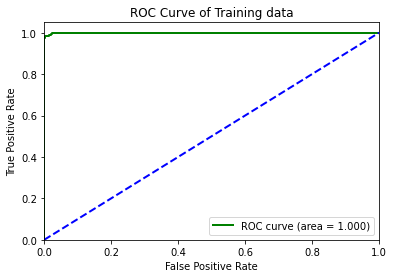

The confusion matrix of the  testing  data is:
 [[67  4]
 [ 1 41]]
Accuracy  of the  testing  data is:
0.9558 


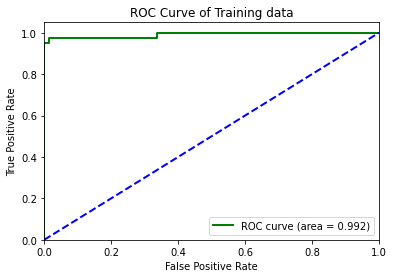

 Average of all the metrics for both training and testing data is: 

          Accuracy Precision    Recall  F1-score       AUC
Training  0.984722  0.987459  0.971373  0.984695   0.99876
Testing   0.967257  0.960437  0.952381  0.967198  0.991393


In [694]:
l1_train_data, l1_test_data, l1_svm_avg = mcl1SVM(30, breast_df)

In [695]:
print(" All the metric for training data for each run of Monte-Carlo is \n", l1_train_data)

 All the metric for training data for each run of Monte-Carlo is 
          acc  precision    recall  f1-score       auc
0   0.973684   0.975904  0.952941  0.973619  0.998293
1   0.980263   0.982036  0.964706  0.980227  0.997758
2   0.986842   0.988095  0.976471  0.986826  0.998684
3   0.993421   1.000000  0.982353  0.993409  0.999897
4   0.986842   0.988095  0.976471  0.986826  0.999033
5   0.991228   1.000000  0.976471  0.991206  0.999691
6   0.984649   0.982249  0.976471  0.984640  0.999465
7   0.978070   0.976190  0.964706  0.978043  0.998293
8   0.980263   0.982036  0.964706  0.980227  0.998787
9   0.986842   0.993976  0.970588  0.986809  0.998807
10  0.980263   0.987879  0.958824  0.980201  0.998396
11  0.980263   0.982036  0.964706  0.980227  0.998457
12  0.984649   0.993939  0.964706  0.984601  0.998231
13  0.986842   0.982353  0.982353  0.986842  0.999671
14  0.989035   0.988166  0.982353  0.989028  0.999362
15  0.980263   0.982036  0.964706  0.980227  0.998026
16  0.991228   

In [696]:
print(" All the metric for testing data for each run of Monte-Carlo is \n", l1_test_data)

 All the metric for testing data for each run of Monte-Carlo is 
          acc  precision    recall  f1-score       auc
0   0.982301   0.976190  0.976190  0.982301  0.999665
1   0.982301   0.976190  0.976190  0.982301  0.995976
2   0.973451   0.953488  0.976190  0.973513  0.998659
3   0.964602   0.975000  0.928571  0.964416  0.964118
4   0.964602   0.931818  0.976190  0.964761  0.989604
5   0.964602   0.975000  0.928571  0.964416  0.960094
6   0.946903   0.973684  0.880952  0.946303  0.992958
7   0.991150   0.976744  1.000000  0.991171  0.999329
8   0.982301   0.954545  1.000000  0.982380  1.000000
9   0.955752   1.000000  0.880952  0.955104  0.997317
10  0.973451   0.975610  0.952381  0.973384  0.996982
11  0.973451   1.000000  0.928571  0.973234  0.996647
12  0.973451   1.000000  0.928571  0.973234  0.997988
13  0.929204   0.904762  0.904762  0.929204  0.969819
14  0.982301   0.976190  0.976190  0.982301  0.989940
15  0.964602   0.931818  0.976190  0.964761  0.989940
16  0.946903   0

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data . You can select them randomly. A. Train an L 1 -penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation. B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F 1 -score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [283]:
# Function to split data into labeled and unlabeled
def splitlabel( train_X, train_y, label_size = 0.5, rand = 50):
    
    # Get 50 % of malign data as label data
    mal_idx = np.where(train_y == 1)
    malign = train_X.iloc[mal_idx]
    lab_mal = malign.sample(frac = label_size, random_state = rand)
    
    # Get 50 % of benign data as label data
    ben_idx = np.where(train_y == 0)
    benign = train_X.iloc[ben_idx]
    lab_ben = benign.sample(frac = label_size, random_state = rand)
    train_lab = pd.concat([lab_ben, lab_mal])
    train_lab =train_lab.sort_index(axis=0, ascending=True)
    train_lab_Y = train_y.reindex(train_lab.index)

    # Get remaining as unlabelled data
    train_unlab  = train_X.loc[~train_X.index.isin(train_lab.index)]
    train_unlab_Y = train_y.loc[~train_y.index.isin(train_lab.index)]
    return train_lab, train_lab_Y, train_unlab, train_unlab_Y

Combining part A and part B

In [703]:
def mcSemiSuper(n, data, cls = l1_model, tuned_params = tuned_param ):
    train_details = []
    test_details = []
  
    for i in range(n):
        
        # Split the data
        train_df, test_df = split_dataset(data, test_size = 0.2, rand = i)
         
        # Split the predictors and the response
        trainX, train_y, testX, test_y = split_preres(train_df, test_df)
        
        # Normalize the training and testing dataset
        train_X, test_X = normalize(trainX, testX)
       
        
        # Split training data to label and unlabeled data
        train_labX, train_lab_Y, train_unlabX, train_unlab_Y = splitlabel(trainX, train_y, 0.5, i)
        
        # Normalize the training and testing dataset
        train_lab, train_unlab = normalize(train_labX, train_unlabX)
        model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                             cv = StratifiedKFold(5, random_state = i, shuffle=True) )
        
        # Part A: fitting labeled data with L 1 -penalized SVM classifier
        # Fit the classifier with only labeled data
        #np.any(np.isnan(mat))
        train_lab = train_lab.reset_index(drop=True)
        train_lab_Y = train_lab_Y.reset_index(drop=True)
       
        model.fit(train_lab, train_lab_Y)
        print("The best parameters of labeled data is :", model.best_params_, "\n") 
        
        # Now fit the SVM l1 with best C
        semi_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
        semi_fit.fit(train_lab, train_lab_Y)
        train_unlab.reset_index(drop=True, inplace=True)
        train_unlab_Y.reset_index(drop=True, inplace=True)
       
        # Part B: Find the unlabeled data point that is the farthest to the decision boundary of the SVM
        while len(train_unlab) > 0:
            
            # Find the distance from unlabeled data points to the decision boundary
            y = semi_fit.decision_function(train_unlab)
            w_normal = np.linalg.norm(semi_fit.coef_)

            # Distance from point x to the decision boundary is y/||w||.
            dist = abs(y / w_normal)
            dist = dist.tolist()
                
            # Get the farthest point from the SVM decision boundary
            max_i = np.argmax(dist)
            max_row = [train_unlab.iloc[max_i ,:].values.tolist()]
            new_lab = pd.DataFrame(data = max_row, columns = train_unlab.columns)
            new_unlab_pred = pd.Series(semi_fit.predict(new_lab))
     
            # Add the farthest point from the SVM boundary to the labeled data
            train_lab = pd.concat([train_lab , new_lab], ignore_index=True)
            train_lab_Y = pd.concat([train_lab_Y, new_unlab_pred],ignore_index=True)
            
            # Remove the point which is at maximum dist from SVm boundary
            dist.pop(max_i)
            train_unlab = train_unlab.drop([train_unlab.index[max_i]])

            # refit the SVC
            semi_fit.fit(train_lab, train_lab_Y)
        
        # Predict the response
        # For the training data
        pred_y = semi_fit.predict(train_lab)
        prob_y = semi_fit.decision_function(train_lab)
        accuracy, pre, recall, f1_score, auc = displayResult(train_lab_Y, pred_y, prob_y)
        train_details.append( [accuracy, pre, recall, f1_score, auc])
        
        # For the testing data
        pred_y_tst = semi_fit.predict(test_X)
        prob_y_test = semi_fit.decision_function(test_X)
        accu_test, pre_test, recall_test, f1_score_test, auc_test = displayResult(test_y, pred_y_tst, prob_y_test)
        test_details.append([accu_test, pre_test, recall_test, f1_score_test, auc_test])
        
    print("\n Confusion Matrix and ROC plot of ",i + 1," run of Monte-Carlo is: \n")
    
    # Display confusion matrix and ROC curve for training data
    dispCOROC(train_lab_Y, pred_y, prob_y, 'training')
    
    # Display confusion matrix and ROC curve for testing data
    dispCOROC( test_y, pred_y_tst,prob_y_test, 'testing')
    train_semi_all = pd.DataFrame(data = train_details, columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_all = pd.DataFrame(data = test_details,columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    # Find out average of all the metrics
    print(" Average of all the metrics for both training and testing data is: \n")
    train_report = np.array(train_semi_all).mean(axis = 0).tolist()
    test_report  = np.array(test_all).mean(axis = 0).tolist()   
    semi_avgs = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    semi_avgs.loc['Training',:] = train_report
    semi_avgs.loc['Testing',:] = test_report
    print(semi_avgs)
    return train_semi_all, test_all ,semi_avgs


The best parameters of labeled data is : {'C': 1.0} 

The best parameters of labeled data is : {'C': 100000.0} 

The best parameters of labeled data is : {'C': 10000.0} 

The best parameters of labeled data is : {'C': 100000.0} 

The best parameters of labeled data is : {'C': 100000.0} 

The best parameters of labeled data is : {'C': 10000.0} 

The best parameters of labeled data is : {'C': 1000.0} 

The best parameters of labeled data is : {'C': 10000.0} 

The best parameters of labeled data is : {'C': 10000.0} 

The best parameters of labeled data is : {'C': 100000.0} 

The best parameters of labeled data is : {'C': 10000.0} 

The best parameters of labeled data is : {'C': 1000000.0} 

The best parameters of labeled data is : {'C': 10000000.0} 

The best parameters of labeled data is : {'C': 10000000.0} 

The best parameters of labeled data is : {'C': 1000.0} 

The best parameters of labeled data is : {'C': 100000.0} 

The best parameters of labeled data is : {'C': 1000000.0} 

The b

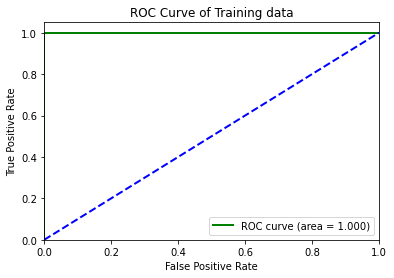

The confusion matrix of the  testing  data is:
 [[69  2]
 [ 2 40]]
Accuracy  of the  testing  data is:
0.9646 


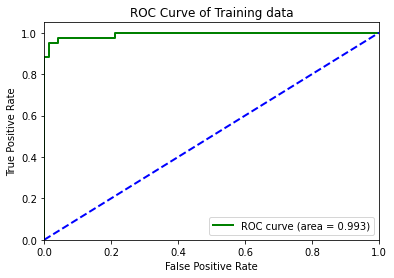

 Average of all the metrics for both training and testing data is: 

          Accuracy Precision    Recall  F1-score      AUC
Training  0.994371  0.995796  0.988813   0.99436  0.99948
Testing   0.956932  0.955787  0.928571  0.956705  0.98596


In [704]:
semi_train_data, semi_test_data, semi_svm_avg = mcSemiSuper(30, breast_df)

In [710]:
print(" All the metric for training data for each run of Monte-Carlo is \n", semi_train_data)

 All the metric for training data for each run of Monte-Carlo is 
          acc  precision    recall  f1-score       auc
0   0.975877   0.986755  0.943038  0.975744  0.993671
1   1.000000   1.000000  1.000000  1.000000  1.000000
2   0.982456   0.987805  0.964286  0.982411  0.998615
3   0.997807   1.000000  0.993865  0.997806  1.000000
4   0.997807   1.000000  0.994220  0.997806  0.999877
5   0.995614   0.993939  0.993939  0.995614  0.999938
6   0.991228   0.988024  0.988024  0.991228  0.999088
7   0.993421   1.000000  0.982036  0.993408  0.999793
8   0.986842   0.987879  0.976048  0.986825  0.999109
9   1.000000   1.000000  1.000000  1.000000  1.000000
10  0.995614   0.994152  0.994152  0.995614  0.999979
11  1.000000   1.000000  1.000000  1.000000  1.000000
12  1.000000   1.000000  1.000000  1.000000  1.000000
13  1.000000   1.000000  1.000000  1.000000  1.000000
14  0.980263   0.971429  0.977011  0.980274  0.998533
15  1.000000   1.000000  1.000000  1.000000  1.000000
16  1.000000   

In [712]:
print(" All the metric for testing data for each run of Monte-Carlo is \n", semi_test_data)

 All the metric for testing data for each run of Monte-Carlo is 
          acc  precision    recall  f1-score       auc
0   0.902655   0.969697  0.761905  0.899715  0.967807
1   0.973451   1.000000  0.928571  0.973234  0.993628
2   0.991150   1.000000  0.976190  0.991128  0.999665
3   0.946903   1.000000  0.857143  0.945937  0.952381
4   0.946903   0.891304  0.976190  0.947340  0.966801
5   0.964602   0.975000  0.928571  0.964416  0.966130
6   0.946903   0.973684  0.880952  0.946303  0.991952
7   0.938053   0.906977  0.928571  0.938198  0.992287
8   0.991150   0.976744  1.000000  0.991171  1.000000
9   0.938053   0.972973  0.857143  0.937146  0.985915
10  0.946903   0.950000  0.904762  0.946624  0.990610
11  0.955752   0.951220  0.928571  0.955640  0.992958
12  0.973451   1.000000  0.928571  0.973234  0.998323
13  0.929204   0.947368  0.857143  0.928403  0.967807
14  0.955752   0.951220  0.928571  0.955640  0.981221
15  0.929204   0.869565  0.952381  0.929787  0.990275
16  0.938053   0

###  iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2. A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum? B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs. C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

In [734]:
def findClusterDist(X, center, train_label ):
    dist_0 = np.array([])
    dist_1 = np.array([])
    proba_0= np.array([])
    proba_1= np.array([])
    for i in range(0, len(X)):
        dist_0 = np.append(dist_0 , np.linalg.norm(X.values[i] - center[train_label[0]]))
        proba_0 = np.append(proba_0,np.linalg.norm(X.values[i] - center[0]))
        dist_1 = np.append(dist_1,np.linalg.norm(X.values[i] - center[train_label[1]]))
        proba_1 = np.append(proba_1,np.linalg.norm(X.values[i]- center[1]))
    proba_0 = softmax(proba_0).astype(np.float64)
    proba_1 = softmax(proba_1).astype(np.float64)
    return [dist_0, dist_1], [proba_0, proba_1]

In [749]:
def findMaj(X, Y, label):
    majority_lab = label.copy()
    map_lab_clus = np.ndarray((2,), dtype = 'int')
    for i in range(0, 2):
        idx, = np.where(label == i)
        sorts = np.sort(idx, axis = 0) 
        
        # Get the closest 30 data points to each center 
        best = sorts[:30]
        maj = Y.iloc[best].value_counts().index[0]
        majority_lab[idx] = maj
        map_lab_clus[maj] = i
    return map_lab_clus, majority_lab


For the algorithm to be not trapped in a local minimum, it can be run multiple times.  max_iter parameter is used to restarts the algorithm many times.

In [752]:
# Combining part A, B and C below
def monteCarloKmeans(n, data, cls = l1_model, tuned_params = tuned_param ):
    train_details = []
    test_details = []
  
    for i in range(n):
        
        # Split the data
        train_df, test_df = split_dataset(data, test_size = 0.2, rand = i)
         
        # Split the predictors and the response
        trainX, train_y, testX, test_y = split_preres(train_df, test_df)
        
        # Normalize the training and testing dataset
        train_X, test_X = normalize(trainX, testX)
       
        # K-means clusters
        # Initializing randomly by using init = 'random' parameter 
        # max_iter, default=300
        cluster = KMeans(init = 'random',n_clusters=2, n_init=10,max_iter = 400, random_state=i).fit(train_X)
        
        # Predict and evaluate the model
        # Training data set
        train_label = cluster.predict(train_X)
        dist, proba_train_y = findClusterDist(train_X, cluster.cluster_centers_, train_label )
        lab_clus, pred_y = findMaj(train_X, train_y, train_label)
        
        # Label 0 is positive case. So get the respective cluster 
        # to get the probability.
        pos_clus = lab_clus[0]
        proba_train_y = proba_train_y[pos_clus]     
        accuracy, pre, recall, f1_score, auc = displayResult(train_y, pred_y, proba_train_y)
        train_details.append( [accuracy, pre, recall, f1_score, auc])
        
        # Testing data set
        test_label = cluster.predict(test_X)
        dist_test, proba_test_y = findClusterDist(test_X, cluster.cluster_centers_, test_label )
        lab_clus_tst, pred_y_tst = findMaj(test_X, test_y, test_label)
        pos_clus_te = lab_clus_tst[0]
        proba_test_y = proba_test_y[pos_clus_te]
        accu_test, pre_test, recall_test, f1_score_test, auc_test = displayResult(test_y, pred_y_tst, proba_test_y)
        test_details.append([accu_test, pre_test, recall_test, f1_score_test, auc_test])
        
    print("\n Confusion Matrix and ROC plot of ",i + 1 ," run of Monte-Carlo is: \n")
    
    # Display confusion matrix and ROC curve for training data
    dispCOROC(train_y, pred_y, proba_train_y, 'training')
    
    # Display confusion matrix and ROC curve for testing data
    dispCOROC( test_y, pred_y_tst, proba_test_y, 'testing')
    train_unsup_all = pd.DataFrame(data = train_details, columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_all = pd.DataFrame(data = test_details,columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    # Find out average of all the metrics
    print(" Average of all the metrics for K Mean unsupervised learning for both training and testing data is: \n")
    train_report = np.array(train_unsup_all).mean(axis = 0).tolist()
    test_report  = np.array(test_all).mean(axis = 0).tolist()   
    unsup_avgs = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    unsup_avgs.loc['Training',:] = train_report
    unsup_avgs.loc['Testing',:] = test_report
    print(unsup_avgs)
    return train_unsup_all, test_all ,unsup_avgs



 Confusion Matrix and ROC plot of  30  run of Monte-Carlo is: 

The confusion matrix of the  training  data is:
 [[282   4]
 [ 50 120]]
Accuracy  of the  training  data is:
0.8816 


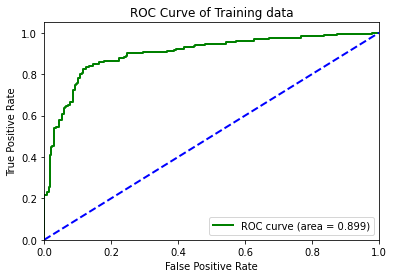

The confusion matrix of the  testing  data is:
 [[69  2]
 [11 31]]
Accuracy  of the  testing  data is:
0.8850 


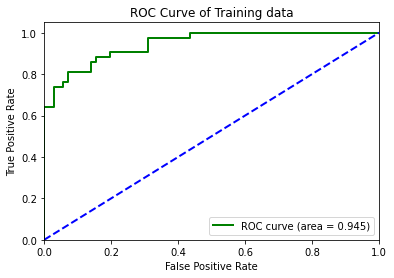

 Average of all the metrics for K Mean unsupervised learning for both training and testing data is: 

          Accuracy Precision    Recall  F1-score       AUC
Training  0.886477  0.957023  0.728431   0.88249  0.910233
Testing   0.891445  0.965734  0.734127  0.887202  0.916097


In [753]:
train_unsup, test_unsup ,unsup_avgs = monteCarloKmeans(30, breast_df)

In [754]:
print(" All the metric for training data for each run of Monte-Carlo Unsupervised learning is \n", train_unsup)

 All the metric for training data for each run of Monte-Carlo Unsupervised learning is 
          acc  precision    recall  f1-score       auc
0   0.890351   0.947761  0.747059  0.887105  0.916063
1   0.894737   0.929577  0.776471  0.892470  0.918984
2   0.883772   0.968000  0.711765  0.879146  0.912361
3   0.896930   0.962406  0.752941  0.893768  0.920012
4   0.888158   0.954198  0.735294  0.884482  0.914541
5   0.888158   0.954198  0.735294  0.884482  0.904114
6   0.894737   0.955224  0.752941  0.891620  0.919313
7   0.885965   0.953846  0.729412  0.882089  0.907610
8   0.885965   0.960938  0.723529  0.881829  0.902879
9   0.899123   0.955882  0.764706  0.896348  0.917441
10  0.890351   0.961538  0.735294  0.886624  0.907651
11  0.888158   0.947368  0.741176  0.884727  0.926018
12  0.872807   0.944444  0.700000  0.867896  0.903167
13  0.899123   0.969697  0.752941  0.895918  0.919457
14  0.885965   0.946970  0.735294  0.882342  0.906211
15  0.883772   0.960630  0.717647  0.879421  0.

In [755]:
print(" All the metric for testing data for each run of Monte-Carlo Unsupervised learning is \n", test_unsup)

 All the metric for testing data for each run of Monte-Carlo Unsupervised learning is 
          acc  precision    recall  f1-score       auc
0   0.867257   1.000000  0.642857  0.859169  0.908786
1   0.911504   0.970588  0.785714  0.909207  0.908451
2   0.902655   0.942857  0.785714  0.900517  0.902750
3   0.849558   0.962963  0.619048  0.840392  0.887995
4   0.876106   0.966667  0.690476  0.870609  0.882629
5   0.893805   0.968750  0.738095  0.890123  0.952046
6   0.867257   0.965517  0.666667  0.860671  0.875252
7   0.911504   0.970588  0.785714  0.909207  0.927230
8   0.902655   0.942857  0.785714  0.900517  0.952381
9   0.849558   0.962963  0.619048  0.840392  0.894031
10  0.884956   0.939394  0.738095  0.881482  0.935278
11  0.893805   1.000000  0.714286  0.889093  0.854125
12  0.938053   1.000000  0.833333  0.936692  0.940979
13  0.840708   0.928571  0.619048  0.831926  0.898055
14  0.929204   1.000000  0.809524  0.927365  0.941315
15  0.893805   0.968750  0.738095  0.890123  0.9

### iv) Spectral Clustering : Repeat 1(b)iii using spectral clustering , which is clus- tering based on kernels. 3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method. 

In [760]:
def monteCarloSpec(n, data, cls = l1_model, tuned_params = tuned_param ):
    train_details = []
    test_details = []
  
    for i in range(n):
        
        # Split the data
        train_df, test_df = split_dataset(data, test_size = 0.2, rand = i)
         
        # Split the predictors and the response
        trainX, train_y, testX, test_y = split_preres(train_df, test_df)
        
        # Normalize the training and testing dataset
        train_X, test_X = normalize(trainX, testX)
       
        # K-means clusters
        # kernel as'rbf' and gamma = 1 
        cluster = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', eigen_tol = 1e-2, 
                                    eigen_solver = 'arpack', random_state = i)
        label = cluster.fit_predict(train_X)
        cluster_centers = []
        for clus in [0,1]:
            cluster_centers.append(np.mean(train_X[label==clus], axis = 0).tolist())
        
        # build a KNN classifier
        knn_cls = knn(n_neighbors=1)
        knn_cls.fit(train_X, label)
        
        # Predict and evaluate the model
        # Training data set
        train_label = knn_cls.predict(train_X)
        dist, prob_train = findClusterDist(train_X, cluster_centers, train_label )
        lab_clus, pred_y = findMaj(train_X, train_y, train_label)
        pos_clus = lab_clus[0]
        prob_train = prob_train[ pos_clus]
        accuracy, pre, recall, f1_score, auc = displayResult(train_y, pred_y, prob_train)
        train_details.append( [accuracy, pre, recall, f1_score, auc])
        
        # Testing data set
        test_label = knn_cls.predict(test_X)
        dist_test , prob_test = findClusterDist(test_X, cluster_centers, test_label )
        lab_clus_test, pred_y_tst = findMaj(test_X, test_y, test_label)
        pos_clus_te = lab_clus_test[0]
        prob_test = prob_test[ pos_clus_te]
        
        accu_test, pre_test, recall_test, f1_score_test, auc_test = displayResult(test_y, pred_y_tst, prob_test)
        test_details.append([accu_test, pre_test, recall_test, f1_score_test, auc_test])
        
    print("\n Confusion Matrix and ROC plot of ",i + 1 ," run of Monte-Carlo is: \n")
    
    # Display confusion matrix and ROC curve for training data
    dispCOROC(train_y, pred_y,prob_train, 'training')
    
    # Display confusion matrix and ROC curve for testing data
    dispCOROC( test_y, pred_y_tst, prob_test, 'testing')
    train_spec_all = pd.DataFrame(data = train_details, columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_all = pd.DataFrame(data = test_details,columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    # Find out average of all the metrics
    print(" Average of all the metrics for K Mean specervised learning for both training and testing data is: \n")
    train_report = np.array(train_spec_all).mean(axis = 0).tolist()
    test_report  = np.array(test_all).mean(axis = 0).tolist()   
    spec_avgs = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    spec_avgs.loc['Training',:] = train_report
    spec_avgs.loc['Testing',:] = test_report
    print(spec_avgs)
    return train_spec_all, test_all ,spec_avgs

       


 Confusion Matrix and ROC plot of  30  run of Monte-Carlo is: 

The confusion matrix of the  training  data is:
 [[282   4]
 [ 51 119]]
Accuracy  of the  training  data is:
0.8794 


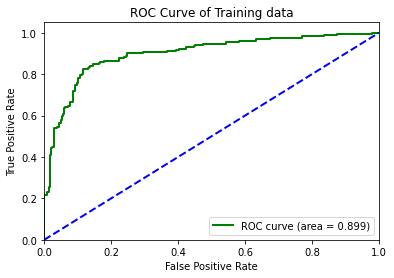

The confusion matrix of the  testing  data is:
 [[70  1]
 [12 30]]
Accuracy  of the  testing  data is:
0.8850 


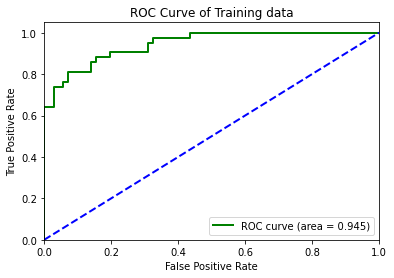

 Average of all the metrics for K Mean specervised learning for both training and testing data is: 

          Accuracy Precision    Recall  F1-score       AUC
Training  0.881287  0.958751  0.712353  0.876719  0.908265
Testing   0.879941  0.961185  0.705556  0.874528  0.914252


In [761]:
train_spec, test_spec ,spec_avgs = monteCarloSpec(30, breast_df)

In [762]:
print(" All the metric for training data for each run of Monte-Carlo Unsupervised learning is \n", train_spec)

 All the metric for training data for each run of Monte-Carlo Unsupervised learning is 
          acc  precision    recall  f1-score       auc
0   0.890351   0.954545  0.741176  0.886868  0.914932
1   0.881579   0.932836  0.735294  0.878073  0.913821
2   0.879386   0.967480  0.700000  0.874291  0.911086
3   0.885965   0.968254  0.717647  0.881562  0.916104
4   0.883772   0.960630  0.717647  0.879421  0.912320
5   0.885965   0.953846  0.729412  0.882089  0.903661
6   0.888158   0.961240  0.729412  0.884230  0.916310
7   0.881579   0.953125  0.717647  0.877284  0.906088
8   0.877193   0.967213  0.694118  0.871853  0.898622
9   0.890351   0.961538  0.735294  0.886624  0.913780
10  0.879386   0.960000  0.705882  0.874585  0.904237
11  0.883772   0.946565  0.729412  0.879952  0.924969
12  0.872807   0.944444  0.700000  0.867896  0.903167
13  0.892544   0.968992  0.735294  0.888770  0.917544
14  0.877193   0.945312  0.711765  0.872739  0.903723
15  0.879386   0.960000  0.705882  0.874585  0.

In [763]:
print(" All the metric for testing data for each run of Monte-Carlo Unsupervised learning is \n", test_spec)

 All the metric for testing data for each run of Monte-Carlo Unsupervised learning is 
          acc  precision    recall  f1-score       auc
0   0.867257   1.000000  0.642857  0.859169  0.907780
1   0.911504   0.970588  0.785714  0.909207  0.904762
2   0.867257   0.935484  0.690476  0.862027  0.902414
3   0.823009   0.958333  0.547619  0.808829  0.883300
4   0.867257   0.965517  0.666667  0.860671  0.879611
5   0.867257   0.965517  0.666667  0.860671  0.951040
6   0.858407   0.964286  0.642857  0.850601  0.871227
7   0.902655   0.942857  0.785714  0.900517  0.926895
8   0.893805   0.941176  0.761905  0.891048  0.950369
9   0.823009   0.958333  0.547619  0.808829  0.889671
10  0.893805   0.968750  0.738095  0.890123  0.932260
11  0.876106   0.966667  0.690476  0.870609  0.851442
12  0.911504   0.970588  0.785714  0.909207  0.940979
13  0.814159   0.920000  0.547619  0.800517  0.895037
14  0.893805   0.968750  0.738095  0.890123  0.938967
15  0.884956   0.967742  0.714286  0.880424  0.9

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods

In [764]:
summary_train = pd.concat([l1_svm_avg.loc['Training',:], semi_svm_avg.loc['Training',:], unsup_avgs.loc['Training',:], \
                     spec_avgs.loc['Training',:]], axis = 1)
summary_train.columns = ['Supervised', 'Semi - Supervised', 'Unsupervised - KMeans', 'Unsupervised - Spectral Clustering']
print("The summary of training data of all the above classifier is :\n", summary_train.T)

The summary of training data of all the above classifier is :
                                     Accuracy Precision    Recall  F1-score  \
Supervised                          0.984722  0.987459  0.971373  0.984695   
Semi - Supervised                   0.994371  0.995796  0.988813   0.99436   
Unsupervised - KMeans               0.886477  0.957023  0.728431   0.88249   
Unsupervised - Spectral Clustering  0.881287  0.958751  0.712353  0.876719   

                                         AUC  
Supervised                           0.99876  
Semi - Supervised                    0.99948  
Unsupervised - KMeans               0.910233  
Unsupervised - Spectral Clustering  0.908265  


In [765]:
summary_test = pd.concat([l1_svm_avg.loc['Testing',:], semi_svm_avg.loc['Testing',:], unsup_avgs.loc['Testing',:], \
                     spec_avgs.loc['Testing',:]], axis = 1)
summary_test.columns = ['Supervised', 'Semi - Supervised', 'Unsupervised - KMeans', 'Unsupervised - Spectral Clustering']
print("The summary of testing data of all the above classifier is :\n", summary_test.T)

The summary of testing data of all the above classifier is :
                                     Accuracy Precision    Recall  F1-score  \
Supervised                          0.967257  0.960437  0.952381  0.967198   
Semi - Supervised                   0.956932  0.955787  0.928571  0.956705   
Unsupervised - KMeans               0.891445  0.965734  0.734127  0.887202   
Unsupervised - Spectral Clustering  0.879941  0.961185  0.705556  0.874528   

                                         AUC  
Supervised                          0.991393  
Semi - Supervised                    0.98596  
Unsupervised - KMeans               0.916097  
Unsupervised - Spectral Clustering  0.914252  


From the above summary table, It is evident that Supervised learning performs best among all the learning method. Followed by Semi - supervised and then Unsupervised learning. The gap in accuracy of model between Supervised and Semi supervised learning is less, as compared to the gap between Semi-Supervised and Unsupervised learning. This is due the fact that semi supervised has got help from the actual response. While unsupervised learning has no support from the actual labels. As it is based on the similarity of predictors. 

# 2. Active Learning Using Support Vector Machines 

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication . Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem. 

In [511]:
bank_df = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
bank_df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [513]:
bank_df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [515]:
bank_df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [534]:
# Function to split to test and training data set
def split_bank_trts(bank_df, rand = 2):
    bank_test = bank_df.sample(n = 472, random_state = rand)
    bank_train  = bank_df.loc[~bank_df.index.isin(bank_test.index)]
    return bank_train, bank_test

In [530]:
bank_train, bank_test = split_bank_trts(bank_df)

In [531]:
bank_train

,variance,skewness,curtosis,entropy,class
1,4.54590,8.1674,-2.45860,-1.46210,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
...,...,...,...,...,...
1365,-4.50460,-5.8126,10.88670,-0.52846,1
1366,-2.41000,3.7433,-0.40215,-1.29530,1
1367,0.40614,1.3492,-1.45010,-0.55949,1
1368,-1.38870,-4.8773,6.47740,0.34179,1


In [532]:
bank_test

,variance,skewness,curtosis,entropy,class
199,5.88620,5.87470,-2.81670,-0.30087,0
696,1.64500,7.86120,-0.87598,-3.55690,0
45,-0.78690,9.56630,-3.78670,-7.50340,0
738,0.92703,9.43180,-0.66263,-1.67280,0
792,-2.73380,0.45523,2.43910,0.21766,1
...,...,...,...,...,...
185,-1.25370,10.88030,1.93100,-4.32370,0
193,4.82720,3.06870,0.68604,0.80731,0
349,-4.28590,8.52340,3.13920,-0.91639,0
1150,-4.20910,4.72830,-0.49126,-5.21590,1


In [533]:
# function to split predictor and response of Bank dataframe
def split_bank_preres(train_df, test_df):
    trainX = train_df.iloc[:, :-1]
    testX = test_df.iloc[:, :-1]
    trainY = train_df.iloc[:, -1]
    testY = test_df.iloc[:, -1]
    return trainX, trainY, testX, testY

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

###  i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L 1 penalty. Select the penalty parameter using 5-fold cross validation. 4 Repeat this process by adding 10 other randomlyselected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning .

In [661]:
def passiveLearning(train_X, train_y, test_X, test_y, cls = l1_model, tuned_params = tuned_param ):
    poolX = train_X
    pooly = train_y 
    main_X = pd.DataFrame()
    main_y = pd.DataFrame()
    poolX.reset_index(drop=True, inplace=True)
    pooly.reset_index(drop=True, inplace=True)
    test_error = np.array([])
    while len(poolX) > 0:
        
        # Randomly select 10 samples and add to dataset
        main_X = pd.concat([main_X, poolX.sample(n = 10, random_state = 0)])
        main_y  =  pooly.reindex(main_X.index)#[main_X.index]
        
        # Delete the chosen 10 sample from the pool
        poolX = poolX.loc[~poolX.index.isin(main_X.index)]

        # Apply cross validation
        model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                             cv = StratifiedKFold(5, random_state = i, shuffle=True) )
    
        # Fit the classifier
        model.fit(main_X, main_y)
        print("The best parameters of the bank data is :", model.best_params_) #, "\n"
        
         # Now fit the SVM l1 with best C
        best_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
        best_fit.fit(main_X, main_y)
 
        # Predict the response for the testing data
        pred_y_tst = best_fit.predict(test_X)
        acc = accuracy_score(test_y, pred_y_tst)
        test_error = np.append(test_error, 1 - acc)
        print("The Test error with ",main_X.shape[0]," data is :", 1 - acc) 
    return test_error

In [675]:

def mcActPas(n, data, type = 'passive', cls = l1_model, tuned_params = tuned_param ):
    errors = []
    
    for i in range(n):
        
        # randomly split data
        train_df, test_df = split_bank_trts(bank_df, rand = i)
        
        # Seprate predictors and response
        trainX, train_y, testX, test_y = split_bank_preres(train_df, test_df)
        
        # Normalize the training and testing dataset
        train_X, test_X = normalize(trainX, testX)
        
        # Get the test error of 90 runs each
        print("Test error for Iteration: ", i + 1, "\n")
        if type == 'passive':
            test_error = passiveLearning(train_X, train_y, test_X, test_y, cls, tuned_params)
        elif type == 'active':
            test_error = activeLearning(train_X, train_y, test_X, test_y, cls, tuned_params)
        else:
            print("Wrong choice")
            break
        errors.append(test_error)
        print("\n")
        
    
    #passive = np.array(learning_curve)
    errors = np.mean(errors, axis=0)
    return errors

In [678]:
passive_arr =  mcActPas(50, bank_df, 'passive')

Test error for Iteration:  1 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.21610169491525422
The best parameters of the bank data is : {'C': 1000000.0}
The Test error with  20  data is : 0.048728813559322015
The best parameters of the bank data is : {'C': 0.1}
The Test error with  30  data is : 0.125
The best parameters of the bank data is : {'C': 1.0}
The Test error with  40  data is : 0.03813559322033899
The best parameters of the bank data is : {'C': 1.0}
The Test error with  50  data is : 0.03177966101694918
The best parameters of the bank data is : {'C': 1.0}
The Test error with  60  data is : 0.03389830508474578
The best parameters of the bank data is : {'C': 1.0}
The Test error with  70  data is : 0.03601694915254239
The best parameters of the bank data is : {'C': 1.0}
The Test error with  80  data is : 0.03601694915254239
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.03601694915254239
The 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  770  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  780  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  800  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  830  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  840  data is : 0.012711864406779627
T

The best parameters of the bank data is : {'C': 1000.0}
The Test error with  600  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  620  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  640  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  650  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  660  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  670  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  680  data is : 0.006355932203389814
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  460  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  480  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  490  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  500  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  510  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  520  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  530  data is : 0.010593220338983023
The best 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  300  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  310  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  320  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  330  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  350  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  360  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.006355932203389814
T

The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  150  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  200  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  210  data is : 0.004237288135593209


The best parameters of the bank data is : {'C': 1.0}
The Test error with  870  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  6 

The best parameters of the bank data is : {'C': 10000.0}
The Test error with  10  data is : 0.09110169491525422
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.07203389830508478
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.06144067796610164
The best parameters of the bank data is : {'C': 1.0}
The Test error with  40  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is

The best parameters of the bank data is : {'C': 1.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  790  data is : 0.014830508474576232
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  600  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  630  data is : 0.004237288135593209
The be

The best parameters of the bank data is : {'C': 100.0}
The Test error with  390  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  470  data is : 0.006355932203389814


The best parameters of the bank data is : {'C': 10000000.0}
The Test error with  230  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  250  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  300  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  310  data is : 0.012711864

The best parameters of the bank data is : {'C': 1.0}
The Test error with  70  data is : 0.03813559322033899
The best parameters of the bank data is : {'C': 100.0}
The Test error with  80  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.03177966101694918
The best parameters of the bank data is : {'C': 100.0}
The Test error with  100  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 100.0}
The Test error with  110  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.006355932203389814
The be

The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  840  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  860  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  870  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  900  data is : 0.008474576271186418




The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  680  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  740  data is : 0.006355932203389814


The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  510  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  520  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  530  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  570  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  580  data is : 0.0021186440677966045
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  350  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  360  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  380  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  410  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.004237288135593209
Th

The best parameters of the bank data is : {'C': 100.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  190  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  200  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  220  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  240  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.006355932203389814

The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.05084745762711862
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.07627118644067798
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.04661016949152541
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.03601694915254239
The best parameters of the bank data is : {'C': 1.0}
The Test error with  60  data is : 0.029661016949152574
The best parameters of the bank data is : {'C': 1.0}
The Test error with  70  data is : 0.029661016949152574
The best parameters of the bank data is : {'C': 1.0}
The Test error with  80  data is : 0.03601694915254239
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.03389830508474578
The best parameters of the bank data is : {'C': 1.0}
The Test error with  100  data is : 0.03389830508474578
The best parameters o

The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  800  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  810  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  840  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.008474576271186418
The

The best parameters of the bank data is : {'C': 1.0}
The Test error with  610  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  620  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  630  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  640  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  650  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  660  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  670  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10000000.0}
The Test error with  680  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.00423728

The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  460  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  480  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  490  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  500  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  510  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  520  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  530  data is : 0.014830508474576232
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  300  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  310  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  320  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  340  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  350  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  360  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  370  data is : 0.012711864406779627
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  140  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  150  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 100.0}
The Test error with  160  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  180  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  200  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.0021186440677966045


The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  890  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  20 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.13347457627118642
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.13771186440677963
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.0423728813559322
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  40  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data i

The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.006355932203389814
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  560  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  570  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  600  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  630  data is : 0.006355932203389814
The 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  470  data is : 0.002118644067

The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  250  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  260  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  280  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  300  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  310  data is : 0.010593220338983023
The 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  70  data is : 0.03177966101694918
The best parameters of the bank data is : {'C': 1.0}
The Test error with  80  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 1.0}
The Test error with  100  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  110  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 1.0}
The Test error with  120  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 1.0}
The Test error with  140  data is : 0.02754237288135597
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.021186440677966156
The best param

The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 100.0}
The Test error with  830  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 100.0}
The Test error with  840  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  850  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 1.0}
The Test error with  860  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 1.0}
The Test error with  870  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  880  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.014830508474576232
The 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  670  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  680  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  690  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  710  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10000000.0}
The Test error with  720  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  730  data is : 0.0021186440

The best parameters of the bank data is : {'C': 1.0}
The Test error with  490  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  500  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  510  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  520  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  530  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.006355932203389814
The bes

The best parameters of the bank data is : {'C': 0.1}
The Test error with  330  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 1.0}
The Test error with  340  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  350  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  360  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  370  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  390  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  400  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  410  data is : 0.0063559322033898

The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  180  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  200  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  220  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  250  data is : 0.01483050847457623

The best parameters of the bank data is : {'C': 10000.0}
The Test error with  10  data is : 0.09533898305084743
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.14830508474576276
The best parameters of the bank data is : {'C': 1000000.0}
The Test error with  30  data is : 0.05932203389830504
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  60  data is : 0.03813559322033899
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.012711864406779627
The best 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  750  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  760  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  780  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  790  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  800  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.004237288135593209
The be

The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  670  data is : 0.008474576271186418
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  430  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  440  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  460  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  480  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  490  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  510  data is : 0.006355932203389814
The bes

The best parameters of the bank data is : {'C': 100.0}
The Test error with  270  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  300  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 1.0}
The Test error with  310  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 100.0}
The Test error with  320  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  340  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  350  data is : 0.016949152542372836
The bes

The best parameters of the bank data is : {'C': 10.0}
The Test error with  110  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  150  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  160  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  170  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  180  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.0021186440677966045
The b

The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  860  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  870  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  890  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  900  data is : 0.004237288135593209


Test error for Iteration:  34 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.1313559322033898
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.10593220338983056
The best parameters of the bank data is : {'C': 1.0}
The Test error with  30  data is 

The best parameters of the bank data is : {'C': 100.0}
The Test error with  690  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  710  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  740  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.010593220338983023
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  530  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  550  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  560  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.010593220338983023
The

The best parameters of the bank data is : {'C': 100.0}
The Test error with  370  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  390  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  430  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  440  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  450  data is : 0.01271186440677

The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  220  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  230  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  260  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  270  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.004237288135593209
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  70  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  90  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  100  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  110  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  120  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.0021186440677966045
The b

The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  800  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  840  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  870  data is : 0.004237288135593209


The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  650  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  680  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.004237288135593209

The best parameters of the bank data is : {'C': 100.0}
The Test error with  470  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  480  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  490  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  500  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  510  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  520  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  530  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  550  data is : 0.004237288135593

The best parameters of the bank data is : {'C': 1.0}
The Test error with  310  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  320  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  340  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  350  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  360  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  380  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  390  data is : 0.010593220338983023
The best 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  170  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  180  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  190  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  200  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  210  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  220  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.0021186440677966045
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.004237288135593209


Test error for Iteration:  43 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  10  data is : 0.0402542372881356
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.03389830508474578
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 100.0}
The Test error with  70  data is : 0

The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  800  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.006355932203389814
Th

The best parameters of the bank data is : {'C': 100.0}
The Test error with  570  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  600  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.00635593220338981

The best parameters of the bank data is : {'C': 1.0}
The Test error with  410  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  420  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  430  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  440  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  460  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  480  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  490  data is : 0.006355932203389814
The best p

The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  270  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.02330508474576276
The best parameters of the bank data is : {'C': 10.0}
The Test error with  300  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  310  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  320  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  330  data is : 0.012711864406779627
The b

The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  100  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 1.0}
The Test error with  110  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  120  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.025423728813559365
The best parameters of the bank data is : {'C': 1.0}
The Test error with  150  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  160  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  170  data is : 0.008474576271186418
The best pa

The best parameters of the bank data is : {'C': 100.0}
The Test error with  850  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  890  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  48 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.13983050847457623
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.06355932203389836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  30  data

The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.006355932203389814


The best parameters of the bank data is : {'C': 100.0}
The Test error with  530  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  540  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000000.0}
The Test error with  550  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  560  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  570  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  600  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  610  data is : 0.0084745

The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.002118644067

In [680]:
print("The mean of all the 90 SVMS using passive learning is:\n", passive_arr)

The mean of all the 90 SVMS using passive learning is:
 [0.15008475 0.07377119 0.04305085 0.0345339  0.02618644 0.02237288
 0.01644068 0.0154661  0.01402542 0.01271186 0.0125     0.01194915
 0.0120339  0.01161017 0.0120339  0.01101695 0.00987288 0.00995763
 0.00923729 0.01012712 0.01012712 0.0095339  0.00915254 0.00805085
 0.00838983 0.00822034 0.00834746 0.0075     0.00813559 0.00728814
 0.00745763 0.00716102 0.00817797 0.00792373 0.00805085 0.00766949
 0.00792373 0.00838983 0.00813559 0.0079661  0.00813559 0.00783898
 0.00775424 0.00724576 0.00766949 0.00766949 0.00745763 0.00716102
 0.00694915 0.00694915 0.00694915 0.00686441 0.00728814 0.00716102
 0.00648305 0.00682203 0.00652542 0.00669492 0.00720339 0.0065678
 0.00711864 0.00741525 0.00762712 0.00733051 0.00720339 0.00741525
 0.00733051 0.00762712 0.0079661  0.00758475 0.00720339 0.00745763
 0.00711864 0.00758475 0.0075     0.00741525 0.0075     0.00720339
 0.00775424 0.00775424 0.00783898 0.00762712 0.00758475 0.00771186
 0.0073

###   ii. Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L 1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning .

In [676]:
def activeLearning(train_X, train_y, test_X, test_y, n, data, cls = l1_model, tuned_params = tuned_param ):
    poolX = train_X
    pooly = train_y 
    poolX.reset_index(drop=True, inplace=True)
    pooly.reset_index(drop=True, inplace=True)
    test_error = np.array([])
    
    # Store 10 sample
    main_X = poolX.sample(n = 10, random_state = 0)
    main_y = pooly.reindex(main_X.index)
    
    # Delete the chosen 10 sample from the pool
    poolX = poolX.loc[~poolX.index.isin(main_X.index)]
    
    # Apply cross validation
    model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                         cv = StratifiedKFold(5, random_state = i, shuffle=True) )

    # Fit the classifier
    model.fit(main_X, main_y)
    print("The best parameters of the bank data is :", model.best_params_)
    
    # Now fit the SVM l1 with best C
    best_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
    best_fit.fit(main_X, main_y)

    # Predict the response for the testing data
    test_predy = best_fit.predict(test_X)
    acc = accuracy_score(test_y, test_predy)
    test_error = np.append(test_error, 1 - acc)
    print("The Test error with ",main_X.shape[0]," data is :", 1 - acc) 
    
    while len(poolX) > 10:
        
        # Selecting closest 10 point to the decision boundary
        y = best_fit.decision_function(poolX)
        w_normal = np.linalg.norm(best_fit.coef_)

        # Distance from point x to the decision boundary is y/||w||.
        dist = abs(y / w_normal)
        idx = np.argpartition(dist, 10)
        top_10 = poolX.iloc[idx[:10],:]
        
        # Add the closest 10 data point to the dataset
        main_X = pd.concat([main_X, top_10])
        main_y  =  pooly.reindex(main_X.index)
        
        # Remove the already selected index from the pool
        poolX = poolX.drop(poolX.index[idx[:10]])

        # Apply cross validation
        model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                             cv = StratifiedKFold(5, random_state = i, shuffle=True) )
    
        # Fit the classifier
        model.fit(main_X, main_y)
        print("The best parameters of the bank data is :", model.best_params_)
        
        # Now fit the SVM l1 with best C
        best_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
        best_fit.fit(main_X, main_y)
 
        # Predict the response for the testing data
        test_predy = best_fit.predict(test_X)
        acc = accuracy_score(test_y, test_predy)
        test_error = np.append(test_error, 1 - acc)
        print("The Test error with ",main_X.shape[0]," data is :", 1 - acc) 
        
    # For the remaining 10 elements in the pool
    # Add the closes 10 samples to the dataset
    #print("Final s", poolX.shape)
    main_X = pd.concat([main_X, poolX])
    main_y  =  pooly.reindex(main_X.index)

    # Apply cross validation
    model = GridSearchCV(estimator= cls, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                         cv = StratifiedKFold(5, random_state = i, shuffle=True) )

    # Fit the classifier
    model.fit(main_X, main_y)
    print("The best parameters of the bank data is :", model.best_params_)

    # Now fit the SVM l1 with best C
    best_fit = LinearSVC(penalty='l1', C = model.best_params_['C'], dual=False)
    best_fit.fit(main_X, main_y)

    # Predict the response for the testing data
    test_predy = best_fit.predict(test_X)
    acc = accuracy_score(test_y, test_predy)
    test_error = np.append(test_error, 1 - acc)
    print("The Test error with ",main_X.shape[0]," data is :", 1 - acc) 
 
    return test_error

In [677]:
active_arr =  mcActPas(50, bank_df, 'active')

Test error for Iteration:  1 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.21610169491525422
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.02754237288135597
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  90  data is : 0.0

The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  800  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.006355932203389814
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  600  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  640  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  650  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  660  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  670  data is : 0.006355932203389814
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  460  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  480  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  490  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  500  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  510  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  520  data is : 0.004237288135593209
Th

The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  300  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  310  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  320  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  330  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  350  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  360  data is : 0.004237288135593209
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  190  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  200  data is : 0.014830508474576232


The best parameters of the bank data is : {'C': 100.0}
The Test error with  860  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.014830508474576232
Final s (10, 4)
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  6 

The best parameters of the bank data is : {'C': 10000.0}
The Test error with  10  data is : 0.07627118644067798
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.3029661016949152
The best parameters of the bank data is : {'C': 1.0}
The Test error with  30  data is : 0.211864406779661
The best parameters of the bank data is : {'C': 10.0}
The Test error wi

The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.006355932203389814
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  540  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  560  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  570  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  590  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  610  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.004237288135593209
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  400  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  420  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  430  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  460  data is : 0.0063559322033898

The best parameters of the bank data is : {'C': 1.0}
The Test error with  220  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  230  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  240  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  300  data is : 0.010593220338983023
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.021186440677966156
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  90  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  100  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  110  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.006355932203389814
The 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  800  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  810  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  830  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  840  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  850  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  860  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  870  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  880  data is : 0.010593220338983023
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  680  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.004237288135593209
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  480  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  490  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  510  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  520  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  530  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  550  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.010593220338983023
The be

The best parameters of the bank data is : {'C': 100.0}
The Test error with  320  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  330  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  350  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  360  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  380  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  400  data is : 0.006355932203389

The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  180  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  200  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  220  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  230  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.008474576271186418


The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.2055084745762712
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.048728813559322015
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.02754237288135597
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  90  data is : 0.010593220338983023
The best para

The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  760  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  790  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  800  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.008474576271186418
The b

The best parameters of the bank data is : {'C': 1.0}
The Test error with  590  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  600  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.004237288135593209
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  450  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  460  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  470  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  480  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  490  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  510  data is : 0.0084745762711

The best parameters of the bank data is : {'C': 100.0}
The Test error with  270  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  280  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  300  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  310  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  320  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  350  data is : 0.016949152542372836
The

The best parameters of the bank data is : {'C': 100.0}
The Test error with  110  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  140  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  170  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.00635593220338981

The best parameters of the bank data is : {'C': 1.0}
The Test error with  850  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  890  data is : 0.0021186440677966045
Final s (10, 4)
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  20 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.13347457627118642
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.07627118644067798
The best parameters of the bank data is : {'C': 10.0}
The Test erro

The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.006355932203389814
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  540  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  570  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  620  data is : 0.006355932203389814
The 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.002118644067

The best parameters of the bank data is : {'C': 100.0}
The Test error with  210  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  220  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  230  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  250  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.00635593220338981

The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  90  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  100  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  110  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.008474576271186418
The be

The best parameters of the bank data is : {'C': 1.0}
The Test error with  790  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  800  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  810  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  840  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  860  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  870  data is : 0.010593220338

The best parameters of the bank data is : {'C': 1.0}
The Test error with  640  data is : 0.0
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  680  data is : 0.0
The best parameters of the bank data is : {'C': 10.0}
The Test error with  690  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  700  data is : 0.0
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  720  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  490  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  510  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  520  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  530  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  540  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  550  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  560  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.0042372881355932

The best parameters of the bank data is : {'C': 10.0}
The Test error with  330  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  350  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  360  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  400  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.010593220338983023
T

The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  190  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  200  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  210  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  220  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  230  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  250  data is : 0.006355932203389814


The best parameters of the bank data is : {'C': 1000.0}
The Test error with  10  data is : 0.09110169491525422
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.05508474576271183
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.05932203389830504
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.029661016949152574
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.014830508474576232
The best parameters of the bank data is : {'C': 100.0}
The Test error with  60  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  70  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  80  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  90  data is : 0.0021186440677966045
Th

The best parameters of the bank data is : {'C': 1.0}
The Test error with  750  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  790  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  800  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  810  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  820  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  830  data is : 0.004237288135593209
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  640  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  660  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.006355932203389814
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  440  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  470  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  480  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  490  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  500  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  510  data is : 0.008474576271186418
The b

The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  300  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  310  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  320  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  340  data is : 0.012711864406779627
The best parameters of the bank data is : {'C': 100.0}
The Test error with  350  data is : 0.01271186440677962

The best parameters of the bank data is : {'C': 10.0}
The Test error with  110  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  120  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  130  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  140  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  170  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  180  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  190  data is : 0.0042372881355932

The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  890  data is : 0.004237288135593209
Final s (10, 4)
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.004237288135593209


Test error for Iteration:  34 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.1313559322033898
The best parameters of the bank data is : {'C': 1.0}
The Test error with  20  data is : 0.07415254237288138
The best parameters of the bank data is : {'C': 100.0}
The Test error

The best parameters of the bank data is : {'C': 1.0}
The Test error with  690  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  710  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  720  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10000.0}
The Test error with  730  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  740  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  750  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  760  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  770  data is : 0.004237288135593209
Th

The best parameters of the bank data is : {'C': 10.0}
The Test error with  530  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  550  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.010593220338983023
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  390  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  400  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  410  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  430  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  450  data is : 0.008474576271186

The best parameters of the bank data is : {'C': 1.0}
The Test error with  210  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  220  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  240  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  250  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  260  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  270  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  290  data is : 0.004237288135593209
The

The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  70  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  80  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  90  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  100  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  110  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  120  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  130  data is : 0.0021186440677966045
The be

The best parameters of the bank data is : {'C': 1.0}
The Test error with  790  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  800  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  810  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  820  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 1.0}
The Test error with  830  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  840  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  850  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  870  data is : 0.0021186440677966045


The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  640  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  660  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  670  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  680  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10000000.0}
The Test error with  690  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  710  data is : 0.004237288

The best parameters of the bank data is : {'C': 10.0}
The Test error with  470  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  480  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  490  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  500  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  510  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  520  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  530  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  550  data is : 0.004237288135593209
The

The best parameters of the bank data is : {'C': 1.0}
The Test error with  310  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  320  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  340  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  350  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  360  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  380  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  390  data is : 0.006355932203389814
The 

The best parameters of the bank data is : {'C': 100.0}
The Test error with  150  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10000000.0}
The Test error with  170  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  180  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  190  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 100.0}
The Test error with  200  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  210  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  220  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  230  data is : 0.00423728813

The best parameters of the bank data is : {'C': 100.0}
The Test error with  890  data is : 0.006355932203389814
Final s (10, 4)
The best parameters of the bank data is : {'C': 100.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  43 

The best parameters of the bank data is : {'C': 10.0}
The Test error with  10  data is : 0.0402542372881356
The best parameters of the bank data is : {'C': 10.0}
The Test error with  20  data is : 0.01906779661016944
The best parameters of the bank data is : {'C': 10.0}
The Test error with  30  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  40  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  50  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  60  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 1000.0}
The Test erro

The best parameters of the bank data is : {'C': 10.0}
The Test error with  730  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  750  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  760  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  770  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  780  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 100.0}
The Test error with  790  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 100.0}
The Test error with  800  data is : 0.010593220338983023
The best parameters of the bank data is : {'C': 10.0}
The Test error with  810  data is : 0.008474576271186418

The best parameters of the bank data is : {'C': 10.0}
The Test error with  570  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  600  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  610  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  620  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  630  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  640  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  650  data is : 0.00635593220338981

The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  420  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  440  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  450  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  460  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  470  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  480  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  490  data is : 0.006355932203389814
The 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  250  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  260  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  270  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 10.0}
The Test error with  280  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  290  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  300  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  310  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  320  data is : 0.016949152542372836
The best parameters of the bank data is : {'C': 1.0}
The Test error with  330  data is : 0.016949152542372836
The be

The best parameters of the bank data is : {'C': 100.0}
The Test error with  100  data is : 0.0
The best parameters of the bank data is : {'C': 100.0}
The Test error with  110  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 10.0}
The Test error with  120  data is : 0.0021186440677966045
The best parameters of the bank data is : {'C': 100.0}
The Test error with  130  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  140  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  150  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  160  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  170  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  180  data is : 0.006355932203389814
The best param

The best parameters of the bank data is : {'C': 10.0}
The Test error with  840  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  850  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  860  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  870  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  880  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  890  data is : 0.006355932203389814
Final s (10, 4)
The best parameters of the bank data is : {'C': 10.0}
The Test error with  900  data is : 0.006355932203389814


Test error for Iteration:  48 

The best parameters of the bank data is : {'C': 1.0}
The Test error with  10  data is : 0.13983050847457623
The best parameters of the bank data is : {'C': 10.0}
The Test er

The best parameters of the bank data is : {'C': 10.0}
The Test error with  680  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  690  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  700  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  710  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  720  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  730  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  740  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  750  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 100.0}
The Test error with  760  data is : 0.006355932203389814

The best parameters of the bank data is : {'C': 100.0}
The Test error with  520  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  530  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  540  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  550  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  560  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  570  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  580  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 1.0}
The Test error with  590  data is : 0.006355932203389814
The best parameters of the bank data is : {'C': 10.0}
The Test error with  600  data is : 0.006355932203389814
The b

The best parameters of the bank data is : {'C': 10.0}
The Test error with  370  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1000.0}
The Test error with  380  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  390  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  400  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 10.0}
The Test error with  410  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  420  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 10.0}
The Test error with  430  data is : 0.004237288135593209
The best parameters of the bank data is : {'C': 1.0}
The Test error with  440  data is : 0.008474576271186418
The best parameters of the bank data is : {'C': 1.0}
The Test error with  450  data is : 0.008474576271186418
The

In [683]:
print("The mean of all the 90 SVMS using active learning is:\n", active_arr)

The mean of all the 90 SVMS using active learning is:
 [0.15381356 0.06970339 0.0334322  0.01478814 0.00860169 0.00605932
 0.00495763 0.00444915 0.0045339  0.00495763 0.00491525 0.00512712
 0.0059322  0.00622881 0.00639831 0.00627119 0.00690678 0.00677966
 0.00669492 0.00690678 0.00707627 0.00707627 0.00716102 0.00682203
 0.00716102 0.00690678 0.0070339  0.00652542 0.00720339 0.00711864
 0.00694915 0.00711864 0.00694915 0.00690678 0.00686441 0.00716102
 0.00707627 0.00707627 0.00669492 0.00677966 0.00669492 0.00677966
 0.00677966 0.00690678 0.00711864 0.0070339  0.00711864 0.00699153
 0.00699153 0.00711864 0.00677966 0.00690678 0.00694915 0.00711864
 0.00661017 0.00673729 0.00699153 0.00699153 0.00686441 0.00707627
 0.00690678 0.0070339  0.00711864 0.00686441 0.0070339  0.00694915
 0.0070339  0.00694915 0.00677966 0.00707627 0.00677966 0.0070339
 0.0070339  0.0070339  0.00694915 0.00699153 0.00707627 0.00699153
 0.00682203 0.00694915 0.00711864 0.00694915 0.00694915 0.00711864
 0.00694

## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation

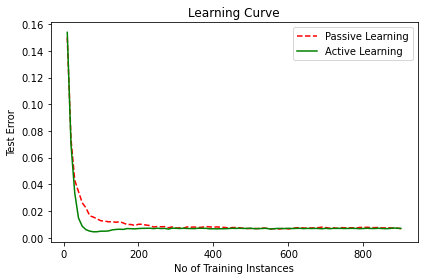

In [681]:
datapoint = np.array([10*i for i in range(1,91)])
plt.plot(datapoint, passive_arr, '--', color="red",  label="Passive Learning")
plt.plot(datapoint, active_arr, color="green", label="Active Learning")
plt.title("Learning Curve")
plt.xlabel("No of Training Instances"), plt.ylabel("Test Error"), plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

From the above graph it is evident that the active learning performs better than passive learning on an average as testing error is less. But as the sample size increases, performance of active and passive learning become similar.

**References**

https://stackabuse.com/k-means-clustering-with-scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://www.datasciencecentral.com/profiles/blogs/steps-to-calculate-centroids-in-cluster-using-k-means-clustering
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
https://towardsdatascience.com/active-learning-5b9d0955292d